## ERA V3 Session-19 Assignment (Reinforcement Learning)

```
You are given a 4x4 GridWorld where an agent starts at the top-left corner (state 0) and tries to reach the bottom-right corner (state 15). The agent can move up, down, left or right with equal probability. The rewards are -1 for each move, and the terminal state (bottom-right) has a reward 0. There are no obstacles. Your task is to:

1. initialize V(s) to 0 for all states
2. Iteratively apply the Bellman equation until convergence
    - where P(s'|s, a) is the transition probability (equal for all moves)
3. Use gamma = 1 (no discounting)
4. Stop when maximum change in V(s) across all states is < 1e - 4
```

Below is the implementation of Bellman Equation for the GridWorld problem:

In [2]:
## Importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the grid
size = 4
r = -1 * np.ones((size, size))
r[-1, -1] = 0  # goal state

# Initial values
values = np.zeros((size, size))
gamma = 1
epsilon = 0.0001

In [3]:
# Dictionary for directions and movements
moves = {
    "up": 0,
    "right": 1, 
    "down": 2,
    "left": 3
}

In [4]:
def next_pos(i, j, move):
    if move == moves["up"]:
        return max(0, i-1), j
    elif move == moves["right"]:
        return i, min(size-1, j+1)
    elif move == moves["down"]:
        return min(size-1, i+1), j
    else:  # move == "left"
        return i, max(0, j-1)

In [5]:
# Run the algorithm until it converges
def run_value_iteration():
    iters = 0
    
    while True:
        iters += 1
        delta = 0
        v_copy = values.copy()
        
        for i in range(size):
            for j in range(size):
                if i == size-1 and j == size-1:  # goal state
                    continue
                
                expect_val = 0
                
                for direction in moves.values():
                    ni, nj = next_pos(i, j, direction)
                    reward = r[i, j]
                    # Add contribution from this direction (0.25 probability for each)
                    expect_val += 0.25 * (reward + gamma * values[ni, nj])
                
                # Update the value for this state
                v_copy[i, j] = expect_val
                
                # Keep track of biggest change
                if abs(v_copy[i, j] - values[i, j]) > delta:
                    delta = abs(v_copy[i, j] - values[i, j])
        
        # Update all values at once
        values[:] = v_copy
        
        if iters % 100 == 0:
            print(f"Iteration {iters}, max change: {delta}")
        
        if delta < epsilon:
            print(f"Done after {iters} iterations")
            break

In [6]:
# Run it
print("Starting...")
run_value_iteration()
print("\nFinal values:")
print(values)

Starting...
Iteration 100, max change: 0.16564811116836609
Iteration 200, max change: 0.0223975903278415
Iteration 300, max change: 0.003028419997747278
Iteration 400, max change: 0.0004094783210462083
Done after 471 iterations

Final values:
[[-59.42367735 -57.42387125 -54.2813141  -51.71012579]
 [-57.42387125 -54.56699476 -49.71029394 -45.13926711]
 [-54.2813141  -49.71029394 -40.85391609 -29.99766609]
 [-51.71012579 -45.13926711 -29.99766609   0.        ]]


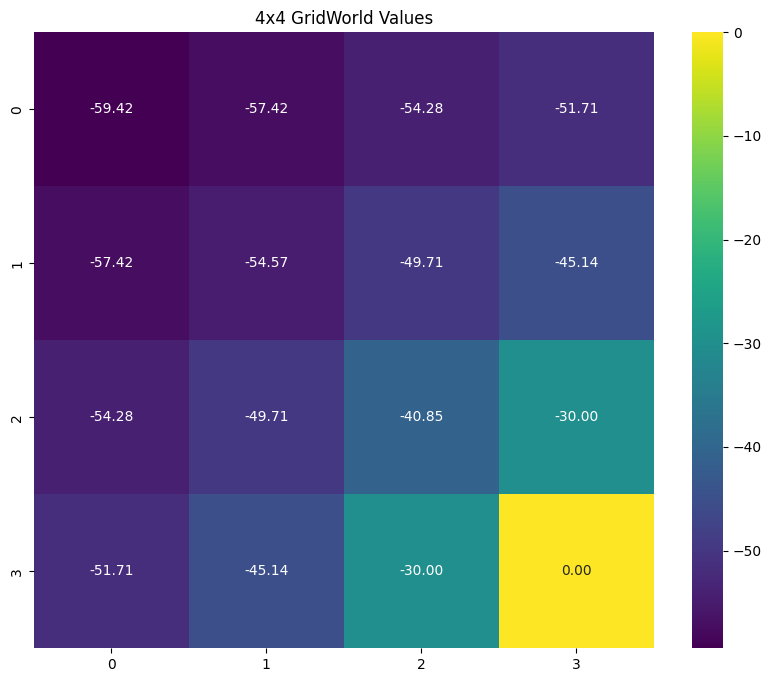

In [7]:
# Make it look pretty
plt.figure(figsize=(10, 8))
sns.heatmap(values, annot=True, fmt=".2f", cmap="viridis")
plt.title("4x4 GridWorld Values")
plt.show()

Expected values (as shared by Rohan sir)
```Python
[
    [-59.42367735, -57.42387125, -54.2813141, -51.71012579],
    [-57.42387125, -54.56699476, -49.71029394, -45.13926711],
    [-54.2813141, -49.71029394, -40.85391609, -29.99766609],
    [-51.71012579, -45.13926711, -29.99766609, 0.0]
]
```

As we can observe, our algorithm has produced the same results